# Анализ сервиса аренды самокатов Go Fast

### Введение

В данном проекте был проведён анализ данных сервиса аренды самокатов Go Fast на основании информации о его пользователях, их поездках и подписках. Нашей основной целью было ознакомиться с особенностями эксплуатации сервиса в зависимости категории пользователя - с подпиской и без, а также выяснить, являются ли пользователи с подпиской более выгодной аудиторией для сервиса.

Чтобы совершать поездки по городу, пользователи сервиса GoFast пользуются мобильным приложением. Сервисом можно пользоваться:
- без подписки 
 * абонентская плата отсутствует;
 * стоимость одной минуты поездки — 8 рублей;
 * стоимость старта (начала поездки) — 50 рублей;

- с подпиской Ultra
 * абонентская плата — 199 рублей в месяц;
 * стоимость одной минуты поездки — 6 рублей;
 * стоимость старта — бесплатно.



### Описание данных

В предосталенных для анализа данных есть информация о пользователях, их поездках и подписках.

**Пользователи** — *users_go.csv*
 * user_id - уникальный идентификатор пользователя
 * name	- имя пользователя
 * age - возраст
 * city - город
 * subscription_type - тип подписки (free, ultra)

**Поездки** — *rides_go.csv*
 * user_id - уникальный идентификатор пользователя
 * distance - расстояние, которое пользователь проехал в текущей сессии (в метрах)
 * duration - продолжительность сессии (в минутах) — время с того момента, как пользователь нажал кнопку «Начать поездку» до момента, как он нажал кнопку «Завершить поездку»
 * date - дата совершения поездки

**Подписки** — *subscriptions_go.csv*
 * subscription_type - тип подписки
 * minute_price - стоимость одной минуты поездки по данной подписке
 * start_ride_price - стоимость начала поездки
 * subscription_fee - стоимость ежемесячного платежа

### План работы

<ol> 
<li>Введение</li>
<li>Описание данных</li>
<li>План работы</li>
<li>Выгрузка данных. Библиотеки</li>
<li>Предобработка данных</li>
<li>Исследовательский анализ данных</li>
<ol>
<li>Частота встречаемости городов</li>
<li>Соотношение пользователей с подпиской и без подписки</li>
<li>Возраст пользователей</li>
<li>Расстояние за одну поездку</li>
<li>Продолжительность поездок</li>
</ol>
<li>Объединение данных</li>
<ol>
<li>Данные о пользователях, поездках и подписках в одном датафрейм</li>
<li>Расстояние за одну поездку</li>
<li>Время поездки</li>
    </ol>
<li>Подсчёт выручки</li>
<ol>
<li>Датафрейм с агрегированными данными о поездках</li> 
</ol>
<li>Проверка гипотез</li>
<ol>
<li>Тратят ли пользователи с подпиской больше времени на поездку, чем бользователи без подписки?</li>    
<li>Сравнение среднего расстояния одной поездки пользователя с подпиской с оптимальной дистанцией.</li>    
<li>Сравнение помесячной выручки пользователй с подпиской и без.</li>
<li>Теоретическая гипотеза</li>
</ol>
<li>Общий вывод</li>
</ol>

### Выгрузка данных. Библиотеки

In [1]:
import pandas as pd
import numpy as np
from scipy import stats as st
import matplotlib.pyplot as plt

In [2]:
users_data = pd.read_csv('/datasets/users_go.csv')
rides_data = pd.read_csv('/datasets/rides_go.csv')
subscriptions_data = pd.read_csv('/datasets/subscriptions_go.csv')

In [3]:
users_data.tail(20)

,user_id,name,age,city,subscription_type
1545,807,Александр,28,Екатеринбург,free
1546,924,Мария,23,Пятигорск,free
1547,635,Герман,21,Москва,ultra
1548,136,Марсель,25,Тюмень,ultra
1549,108,Влада,29,Тюмень,ultra
1550,737,Мелания,27,Ростов-на-Дону,free
1551,666,Зарина,29,Москва,ultra
1552,297,Егор,33,Пятигорск,ultra
1553,121,Алина,25,Пятигорск,ultra
1554,1198,Демид,29,Ростов-на-Дону,free


In [4]:
users_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1565 entries, 0 to 1564
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   user_id            1565 non-null   int64 
 1   name               1565 non-null   object
 2   age                1565 non-null   int64 
 3   city               1565 non-null   object
 4   subscription_type  1565 non-null   object
dtypes: int64(2), object(3)
memory usage: 61.3+ KB


array([[<AxesSubplot:title={'center':'user_id'}>,
        <AxesSubplot:title={'center':'age'}>]], dtype=object)

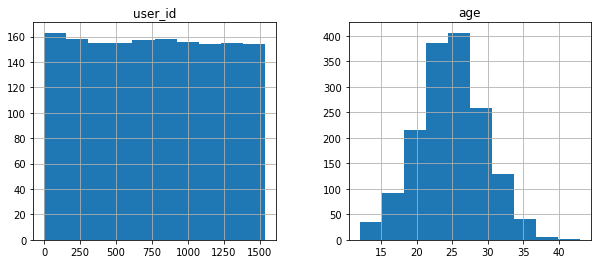

In [5]:
users_data.hist(figsize=(10, 4))

В данных о пользователях 5 строк, 1565 строк, нет пропусков, названия колонок корректны, возможно стоит поменять тип данных в некоторых столбцах. По "хвосту" видим, что id пользователей меньше, чем строк д/ф, предполагаю дубликаты. 

In [6]:
rides_data.head(20)

,user_id,distance,duration,date
0,1,4409.919140,25.599769,2021-01-01
1,1,2617.592153,15.816871,2021-01-18
2,1,754.159807,6.232113,2021-04-20
3,1,2694.783254,18.511000,2021-08-11
4,1,4028.687306,26.265803,2021-08-28
5,1,2770.890808,16.650138,2021-10-09
6,1,3039.020292,14.927879,2021-10-19
7,1,2842.118050,23.117468,2021-11-06
8,1,3412.690668,15.238072,2021-11-14
9,1,748.690645,15.041884,2021-11-22


In [7]:
rides_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18068 entries, 0 to 18067
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   user_id   18068 non-null  int64  
 1   distance  18068 non-null  float64
 2   duration  18068 non-null  float64
 3   date      18068 non-null  object 
dtypes: float64(2), int64(1), object(1)
memory usage: 564.8+ KB


array([[<AxesSubplot:title={'center':'user_id'}>,
        <AxesSubplot:title={'center':'distance'}>],
       [<AxesSubplot:title={'center':'duration'}>, <AxesSubplot:>]],
      dtype=object)

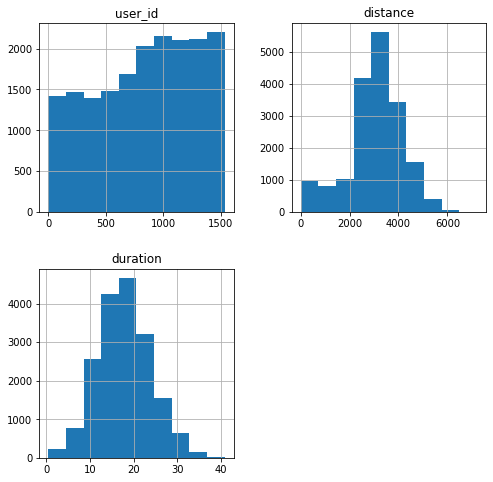

In [8]:
rides_data.hist(figsize=(8, 8))

В данных о поездках 4 столбца, 18068 строк, нет пропусков, названия колонок корректны, стоит поменять тип данных в некоторых столбцах, как минимум с датой. Подозреваю аномальные значения: 0м в расстоянии, но нет 0 мин во времени поездки.

In [9]:
subscriptions_data

,subscription_type,minute_price,start_ride_price,subscription_fee
0,free,8,50,0
1,ultra,6,0,199


In [10]:
subscriptions_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2 entries, 0 to 1
Data columns (total 4 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   subscription_type  2 non-null      object
 1   minute_price       2 non-null      int64 
 2   start_ride_price   2 non-null      int64 
 3   subscription_fee   2 non-null      int64 
dtypes: int64(3), object(1)
memory usage: 192.0+ bytes


В данных о подписках 4 столбца, 2 строки, нет пропусков, названия колонок корректны, типы данных менять не стоит.

### Предобработка данных

Поменяем типы данных в столбцах, где это необходимо.

In [11]:
rides_data['date'] = pd.to_datetime(
    rides_data['date'], format='%Y.%m.%d')



Выведем в отдельный столбец номер месяца, когда была совершена поездка. Перед этим проверим, за сколько лет предоставлены данные, чтобы учесть это при классификации.

In [12]:
rides_data['date'].dt.year.unique()

array([2021])


  Данные предоставлены только за один год - 2021.

In [13]:
rides_data['month'] = rides_data['date'].dt.month

In [14]:
rides_data.head()

,user_id,distance,duration,date,month
0,1,4409.919140,25.599769,2021-01-01,1
1,1,2617.592153,15.816871,2021-01-18,1
2,1,754.159807,6.232113,2021-04-20,4
3,1,2694.783254,18.511000,2021-08-11,8
4,1,4028.687306,26.265803,2021-08-28,8


Проверим наличие пропусков.

In [15]:
users_data.isna().sum()

user_id              0
name                 0
age                  0
city                 0
subscription_type    0
dtype: int64

In [16]:
rides_data.isna().sum()

user_id     0
distance    0
duration    0
date        0
month       0
dtype: int64

In [17]:
subscriptions_data.isna().sum()

subscription_type    0
minute_price         0
start_ride_price     0
subscription_fee     0
dtype: int64

Проверим на наличие дубликатов. Избавимся от явных дубликатов.

In [18]:
users_data.duplicated().sum()

31

In [19]:
users_data.drop_duplicates(inplace=True)

In [20]:
users_data.duplicated().sum()

0

Проверим на наличие неявных дубликатов в столбце с названиями городов и именами.

In [21]:
users_data['city'].unique()

array(['Тюмень', 'Омск', 'Москва', 'Ростов-на-Дону', 'Краснодар',
       'Пятигорск', 'Екатеринбург', 'Сочи'], dtype=object)

In [22]:
users_data['name'].unique()

array(['Кира', 'Станислав', 'Алексей', 'Константин', 'Адель', 'Регина',
       'Игорь', 'Юрий', 'Ян', 'Валерий', 'Агата', 'Марк', 'Ева',
       'Антонина', 'Валерия', 'Амалия', 'Даниил', 'Аделина', 'Святогор',
       'Борис', 'Вероника', 'Ростислав', 'Назар', 'Эдуард', 'Василий',
       'Денис', 'Тамара', 'Николай', 'Эвелина', 'Федор', 'Руслан', 'Иван',
       'Любовь', 'Ярослава', 'Майя', 'Ильдар', 'Данила', 'Нина',
       'Стефания', 'Ясмина', 'Дмитрий', 'Александр', 'Одиссей', 'Арсений',
       'Алла', 'Таисия', 'Максим', 'Юлиана', 'Павел', 'Карина', 'Алиса',
       'Лидия', 'Рамиль', 'Родион', 'Ника', 'Оксана', 'Анастасия',
       'Маргарита', 'Вера', 'Тимур', 'Никита', 'Лев', 'Влад', 'Артур',
       'Анна', 'Ольга', 'Вячеслав', 'Ксения', 'Виталина', 'Владислав',
       'Тамерлан', 'Амина', 'Вадим', 'Олеся', 'Зарина', 'Егор', 'Гордей',
       'Лилия', 'Святослав', 'Роберт', 'Амир', 'Влада', 'Богдан',
       'Полина', 'Марат', 'Елисей', 'Макар', 'Алина', 'Глеб', 'Андрей',
       'Ал

In [23]:
rides_data.duplicated().sum()

0

In [24]:
subscriptions_data.duplicated().sum()

0

Проверим, нет ли аномальных значений в столбце с возрастом пользователей.

In [25]:
users_data['age'].min()

12

### Исследовательский анализ данных

Опишем и визуализируем общую информацию о пользователях и поездках.

#### Частота встречаемости городов

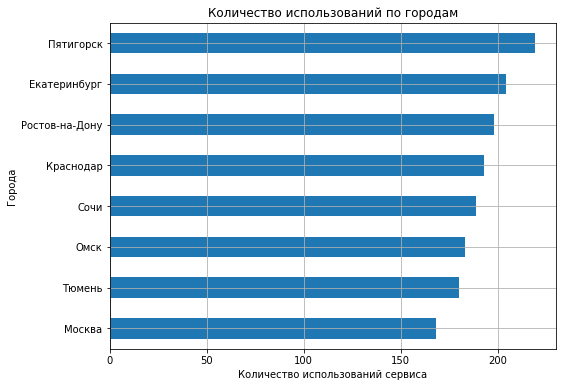

Количество использований по городам:


Пятигорск         219
Екатеринбург      204
Ростов-на-Дону    198
Краснодар         193
Сочи              189
Омск              183
Тюмень            180
Москва            168
Name: city, dtype: int64

In [26]:
users_data.pivot_table(
    index='city', values='user_id', aggfunc='count'
).sort_values(
    by='user_id', ascending=True
).plot(
    kind='barh', grid=True, legend=False, title='Количество использований по городам', xlabel='Города', figsize=(8,6))
plt.xlabel('Количество использований сервиса')
plt.show()

print('Количество использований по городам:')
users_data['city'].value_counts()


Количество пользователей распределено между упомянутыми городами примерно одинаково. Однако больше всего испоьзований сервиса в Пятигорске - 219, а меньше остальных в Москве - 168.

#### Соотношение пользователей с подпиской и без подписки

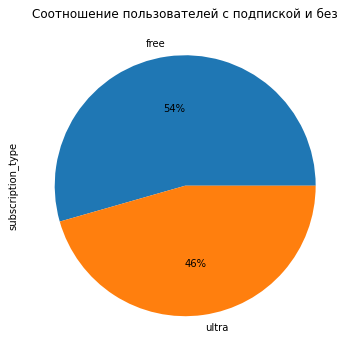

Соотношение пользователей с подпиской и без:


free     835
ultra    699
Name: subscription_type, dtype: int64

In [27]:
users_data['subscription_type'].value_counts().plot(
    kind='pie', figsize=(6, 6), autopct= '%0.0f%%', legend=False, 
    title='Соотношение пользователей с подпиской и без')
plt.show()

print('Соотношение пользователей с подпиской и без:')
users_data['subscription_type'].value_counts()


Соотношение с небольшим перевесом: не оформили подписку 835 человек, оформили - 699.

#### Возраст пользователей

Text(0, 0.5, 'Количество пользователей')

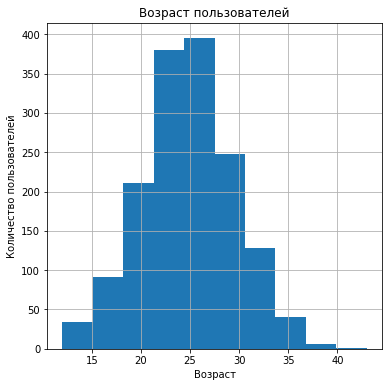

In [28]:
users_data['age'].plot(kind='hist', figsize=(6, 6), grid=True, title='Возраст пользователей')
plt.xlabel('Возраст')
plt.ylabel('Количество пользователей')

In [29]:
print('Возраст пользователей')
users_data['age'].describe()

Возраст пользователей


count    1534.000000
mean       24.903520
std         4.572367
min        12.000000
25%        22.000000
50%        25.000000
75%        28.000000
max        43.000000
Name: age, dtype: float64

Видим, что распределение возрастоов пользователей похоже на нормальное, без выбросов. В среднем возраст пользователя сервиса составляет 25 лет, минимальный - 12, а максимальный - 43.

#### Расстояние за одну поездку

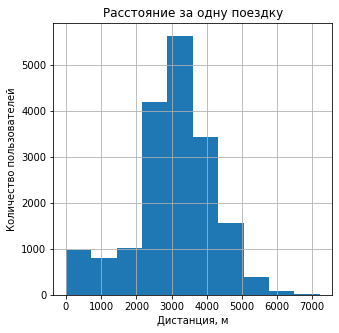

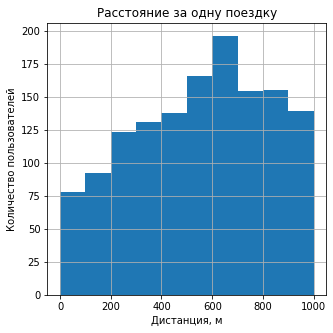

In [30]:
rides_data['distance'].plot(kind='hist', figsize=(5, 5), grid=True, title='Расстояние за одну поездку')
plt.xlabel('Дистанция, м')
plt.ylabel('Количество пользователей')
plt.show()

rides_data['distance'].plot(kind='hist', figsize=(5, 5), grid=True, range=(0, 1000), title='Расстояние за одну поездку')
plt.xlabel('Дистанция, м')
plt.ylabel('Количество пользователей')
plt.show()


In [31]:
print('Расстояние, преодалённое за одну поездку:')
rides_data['distance'].describe()

Расстояние, преодалённое за одну поездку:


count    18068.000000
mean      3070.659976
std       1116.831209
min          0.855683
25%       2543.226360
50%       3133.609994
75%       3776.222735
max       7211.007745
Name: distance, dtype: float64

Видим, что минимальная преодолённая дистанция менее 1м. Изучим подробнее строки со сврхкороткой дистанцией, возьмём < 100м.

In [32]:
short_distance = pd.DataFrame()
short_distance['time'] = rides_data['duration']
short_distance['distance'] = rides_data['distance']
short_distance.sort_values(by='distance').head(10)

,time,distance
11555,10.001902,0.855683
9541,3.011018,2.570787
13690,4.008958,4.329506
8658,6.015656,6.784447
7841,10.026614,7.097072
8906,2.035632,11.283615
8324,4.034952,12.233115
13940,10.045002,15.000606
15626,6.057623,15.366168
11862,13.044660,15.630873


In [33]:
#rides_data.loc[rides_data['distance'] < 100, 'duration'].describe()


    
Всего в данных насчитывается 78 строк с расстоянием поездки менее 100м. Отфильтровав эти строки по затраченному времени, мы видим, что было расстояние было преодолено за слабо правдоподобное короткое время. Так мы можем видеть 2 метра проехали за 3 минуты. По причине человеческого фактора или технического сбоя сервиса, но эти данные являются аномальными и неиформативными. Так как таких строк относительно небольшое количество, то просто избавимся от них.


    
Отфильтровав строки с короткой дистанцией, видим, что это единичные случаи, возможно связанные с какой-либо технической проблемой в работе самоката или сервиса. Поэтому преодолённое расстояние может быть мало, хотя время продолжало идти.
    

In [34]:
#rides_data = rides_data.drop(rides_data[rides_data['distance'] < 100].index, axis=0)
#rides_data.loc[rides_data['distance'] < 100, 'duration'].describe()

На гистограмме видим, что распределение дистанции за одну поездку близко к нормальному. Однако есть выброс в промежутке с короткими дистанциями. При ближайшем рассмотрении видно, что есть пик в значениях 600-700м. Также есть поездки с 0м. В общем чаще всего пользователи совершают поездки 2543-3776м, в среднем - 3070м.

#### Продолжительность поездок

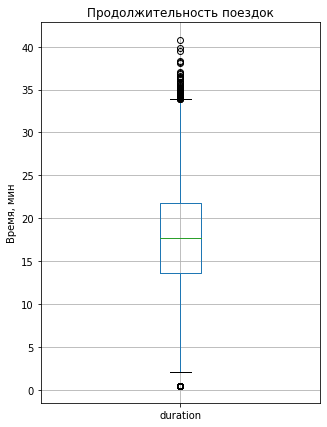

Продолжительность поездок:


count    18068.000000
mean        17.805011
std          6.091051
min          0.500000
25%         13.597563
50%         17.678395
75%         21.724800
max         40.823963
Name: duration, dtype: float64

In [35]:
rides_data.boxplot('duration', figsize=(5, 7))
plt.title('Продолжительность поездок')
plt.ylabel('Время, мин')
plt.show()

print('Продолжительность поездок:')
rides_data['duration'].describe()

По диаграмме видим, что 50% всех поездок длятся от 13.6 до 21.7 минут, медианное время - 17.7 минут. Есть несколько десятков сверхкоротких поездок продолжительностью менее минуты. Самыми продолжительными были несколько поездок до 41 мин.

In [36]:
rides_data.loc[rides_data['duration'] <= 1, 'distance'].describe()

count      95.000000
mean     5113.176549
std       658.254104
min      4030.308008
25%      4611.510820
50%      5052.769411
75%      5488.459099
max      7211.007745
Name: distance, dtype: float64


    
Всего в данных насчитывается 95 строк со временем поездки менее 1 минуты. Отфильтровав эти строки по пройдённой дистанции, мы видим, что было преодолено неправдоподобное расстояние за столь короткое время (в среднем 5км). По причине человеческого фактора или технического сбоя сервиса, но эти данные являются аномальными и неиформативными. Так как таких строк относительно небольшое количество, то просто избавимся от них.


    
Всего насчитывается 95 строк со сверх коротким временем поездки - 0,5 мин. Отфильтровав данные по пройденной за это время дистанции, мы видим, что было преодалено неправдоподобно большое расстояние за столь короткое время. Самокату необходимо было бы развить скорость > 480 км/ч. Очевидно, это аномальные значения, полученные скорее всего из-за сбоя в работе системы определения местоположения. Чтобы не терять данные, обработаем их - заменим значения дистанции на то, которое могло бы быть преодалено со средней скоростью всех поездок без учёта данных аномальных строк. Это важно сделать, иначе в дальнейшем мы получим искажения при анализе информации о дистанции поездок. 

In [37]:
rides_data_good = rides_data.drop(rides_data[rides_data['duration'] <= 1].index, axis=0)
rides_data_good.loc[rides_data_good['duration'] <= 1, 'distance'].describe()

count    0.0
mean     NaN
std      NaN
min      NaN
25%      NaN
50%      NaN
75%      NaN
max      NaN
Name: distance, dtype: float64

In [38]:
rides_data['duration'].value_counts()

0.500000     95
22.184080     1
25.866000     1
22.837062     1
19.173800     1
             ..
18.843765     1
17.644888     1
22.477965     1
19.745218     1
16.537044     1
Name: duration, Length: 17974, dtype: int64

In [39]:
rides_data_good['speed'] = rides_data_good['distance'] / rides_data_good['duration']
rides_data_good['speed'].mean()

176.91526708769788

Средняя скорость без учёта аномалий - 176 м/мин. Менее минуты одно значение - 0,5 мин. В строках с таким временем заменим значение в distance на 176 х 0,5 = 88 метров. Таким образом иправим аномальные значениях в этих строках, чтобы они не искажали в дальнейшем данные, и сохраним строки (не удалим).

In [40]:
rides_data.loc[rides_data['duration'] == 0.5, 'distance'] = 88
rides_data.loc[rides_data['duration'] <= 1, 'distance'].describe()

count    95.0
mean     88.0
std       0.0
min      88.0
25%      88.0
50%      88.0
75%      88.0
max      88.0
Name: distance, dtype: float64

### Объединение данных

#### Данные о пользователях, поездках и подписках в одном датафрейме.

In [ ]:
data = users_data.merge(rides_data, on='user_id').merge(subscriptions_data, on='subscription_type')
data

Получили единую таблицу по трём исходным.


Проверим, прошло ли объединение данных корректно: не потерялись ли данные и не появились ли лишние записи?
   

In [ ]:
data.isna().sum()

In [ ]:
data.duplicated().sum()

In [ ]:
rides_data.info()


Количество строк в полученном датафрейме - 18086, совпадает с первоначальным датафреймом о поездках, так что появление лишних строк исключаем. Дубликатов и пропусков также нет.

Разобъём единую таблицу на две в зависимости от типа подписки пользователя.

In [ ]:
free_data = data.query('subscription_type =="free"')
free_data.head(10)

In [ ]:
ultra_data = data.query('subscription_type == "ultra"')
ultra_data.head(10)

#### Расстояние за одну поездку

In [ ]:
plt.hist([free_data['distance'], ultra_data['distance']], bins=30)
plt.gca().set(xlabel='Дистанция, м', ylabel='Количество поездок', title='Расстояние одной поездки')
plt.legend(['free', 'ultra'])
plt.show()

In [ ]:
free_data['distance'].hist(bins=20, range=(0, 500))
plt.gca().set(xlabel='Дистанция, м', ylabel='Количество поездок', title='Расстояние одной поездки')
plt.show()
print('Растояние поездок без подписки:')
free_data['distance'].describe()

In [ ]:
print('Растояние поездок с подпиской Ultra:')
ultra_data['distance'].describe()


Половина пользователей без подписки проезжает 2340-3877м, среднее растояние в этой категории - 3004м, медианное - 3088м. Максимальная преодалённая дистанция - 7066м. Видим пик в промежутке 0-1000м - единичные короткие поездки. Общее количество поездок 11568.

Половина пользователей с подпиской проезжает 2785-3560м, среднее растояние в этой категории - 3115м, медианное - 3148м. Максимальная преодолённая дистанция - 5699м. Минимальное растояние поездки составило 244м, отсутствуют поездки в 0м. Общее количество поездок 6500.

Можем сделать вывод, что поездки пользователей без подписки более разнообразны в плане преодолённого растояния. Это особенно заметно, если обратиться к стандартному отлонению: у пользователей с подпиской оно составило 836м, а без подписки - целых 1258м.

Также именно пользователи без подписки чаще совершают как короткие поездки (до 500м) - более широкий пик у начала оси, так и поездки в целом совершают чаще практически в 2 раза. Пользователям же с подпиской более характерны более длительные поездки в целом. У этой категории на графике более остарые пики, меньший разброс.

#### Время поезки.

In [ ]:
plt.hist([free_data['duration'], ultra_data['duration']], bins=30)
plt.gca().set(xlabel='Время, мин', ylabel='Количество поездок', title='Продолжительность одной поездки')
plt.legend(['free', 'ultra'])
plt.show()

In [ ]:
print('Продолжительность поездки без подписки:')
free_data['duration'].describe()

In [ ]:
print('Продолжительность поездки с подпиской:')
ultra_data['duration'].describe()


Продолжительность поездки половины пользователей без подписки составляет 12,9-21.6 мин, средняя продолжительность данной категории - 17.4 мин. Пользователи без подписки не проезжали дольше 35 мин.

Продолжительность поездки половины пользователей с подпиской составляет 14.5-21.8 мин, средняя продолжительность данной категории - 18.5 мин. Пользователи без подписки не проезжали дольше 40 мин. Самая короткая поездка составила менее 4-х минут.

У пользователй обоих категорий практически совпадает среднее и медианное значение, небольшие стандартные отклонения. Хотя как и с графиком дистанций, у пользователй без подписки наблюдается чуть больший разброс, более широкий пик.

### Подсчёт выручки

#### Датафрейм с агрегированными данными о поездках на основе датафрейма с объединёнными данными из шага 4.

Найдём суммарное расстояние, количество поездок и суммарное время для каждого пользователя за каждый месяц, также помесячную выручку от каждого пользователя. Округлим длительность поездок.

In [ ]:
data['duration'] = np.ceil(data['duration'])

In [ ]:
total_revenue = data.pivot_table(
    index=('user_id', 'subscription_type', 'month'), 
    values=('name',
        'distance', 
        'duration', 
        'minute_price', 
        'start_ride_price', 
        'subscription_fee'
    ), 
    aggfunc=({'name':'count',
             'distance':'sum', 
             'duration':'sum',
             'minute_price': 'mean',
             'start_ride_price':'mean',
             'subscription_fee':'mean',})
)

total_revenue.rename(columns={'name':'count'}, inplace=True)

total_revenue['revenue_per_month'] = total_revenue['duration'] * total_revenue['minute_price'] + total_revenue['start_ride_price'] * total_revenue['count'] + total_revenue['subscription_fee']
         
total_revenue.head(20)
#я не придумала ничего лучше

In [ ]:
total_revenue['revenue_per_month'].plot(kind='hist', bins=50, grid=True, legend=True, figsize=(8,6), 
                                        title='Выручка за месяц от каждого пользователя')
plt.xlabel('Сумма, руб')
plt.ylabel('Количество пользователей')
plt.show()
print('Выручка за 1 месяц от каждого пользователя:')
total_revenue['revenue_per_month'].describe()

In [ ]:
total_revenue.groupby('month')['revenue_per_month'].sum().plot(style='o-', grid=True, title='Выручка в течение года')
plt.xlabel('Месяц')
plt.ylabel('Сумма, руб.')
plt.show()

In [ ]:
total_revenue['revenue_per_month'].sum()

Создана сводная таблица по ежемесячному доходу от каждого пользователя в отдельности. По ней видно, что зачастую пользователи прибегают к услуге сервиса не единожды. На графике видим распределение выручки по месяцам, практически каждый месяц более 300 тыс руб. Самая низкая выручка - в феврале, а наибольшая май, июнь и январь. Интересно, в каком это городе? Суммарная выручка сервиса за год 3 878 641 руб.

In [ ]:
data.groupby('city')['month'].plot(kind='hist', histtype='step', legend=True, figsize=(10,10), bins=12, 
                                   title='Количество пользователей по городам в течение года')
plt.xlabel('Месяц')
plt.ylabel('Количество пользователей')
plt.show()

Пик в январе сформирован Пятигорском, Ростовом-на-Дону и Сочи. Города с довольно мягкой зимой, так что этот пик не аномален. Хотя Екатеринбург сложно объяснить.

### Проверка гипотез

Продакт-менеджеры сервиса хотят увеличить количество пользователей с подпиской. Для этого они будут проводить различные акции, но сначала выясним несколько важных моментов.

#### Тратят ли пользователи с подпиской больше времени на поездку, чем бользователи без подписки?

* H0: Среднее время поездки пользователей с подпиской Ultra равно среднему времени поездки пользователей без подписки.

* Н1: Среднее время поездки пользователей с подпиской Ultra больше среднего времени поездки пользователей без подписки.

Уровень статистической значимости 5%.

In [ ]:
#обе совок-ти раср. норм-но, ср.зн. обеих совок-тей примерно равны
alpha = 0.05
results = st.ttest_ind(
    ultra_data['duration'],
    free_data['duration'],
    alternative='greater')

print('p-значение:', results.pvalue)

if results.pvalue < alpha:
    print('Отвергаем нулевую гипотезу')
else:
    print('Не получилось отвергнуть нулевую гипотезу')

По результатам t-теста мы можем отвергнуть нулевую гепотезу и равенстве средних продолжительностей поездки пользователей с подпиской и без в пользу альтернативной. Не очень выраженно, но это прослеживается и на гистограммах - с подпиской продолжительность немного больше.

#### Сравнение среднего расстояния одной поездки пользователя с подпиской с оптимальной дистанцией.


    
  Известно, что 3130м это оптимальная дистанция с точки зрения износа самоката. В связи с этим, проверим следующие гипотезы:<br>
* H0: Среднее расстояние поездки пользователей с подпиской не превышает 3130м.
* H1: Среднее расстояние поездки пользователей с подпиской превышает 3130м.

Уровень статистической значимости 5%.

In [ ]:
#обе совок-ти раср. норм-но, ср.зн. обеих совок-тей примерно равны
value = 3130
alpha = 0.05
results = st.ttest_1samp(
    ultra_data['distance'],
    value,
    alternative='greater')

print('p-значение:', results.pvalue)

if results.pvalue < alpha:
    print('Отвергаем нулевую гипотезу')
else:
    print('Не получилось отвергнуть нулевую гипотезу')



По резльтататм t-теста мы не можем отвергнуть гипотезу о том, что среднее расстояние поездок пользователей с подпиской не превышает 3130м. То есть можем считать расстояние поездок пользователей с подпиской оптимальным с точки зрения износа самоката.

#### Сравнение помесячной выручки пользователй с подпиской и без.
Проверьте гипотезу о том, будет ли помесячная выручка от пользователей с подпиской по месяцам выше, чем выручка от пользователей без подписки. Сделайте вывод.

* Н0: Помесячная выручка пользователей с подпиской равна выручке пользователей без подписки.

* Н1: Помесячная выручка пользователей с подпиской выше, чем выручка пользователей без подписки.

Уровень статистической значимости 5%.

In [ ]:
alpha = 0.05
results = st.ttest_ind(
    total_revenue.loc[total_revenue.subscription_fee > 0, 'revenue_per_month'],
    total_revenue.loc[total_revenue.subscription_fee == 0, 'revenue_per_month'],
    alternative='greater')

print('p-значение:', results.pvalue)

if results.pvalue < alpha:
    print('Отвергаем нулевую гипотезу')
else:
    print('Не получилось отвергнуть нулевую гипотезу')

На основании t-теста мы можем отвергнуть нулевую гипотезу о равенстве ежемесячной выручки от пользователей с подпиской и без в пользу альтернативной гипотезы.

### Общий вывод

В проведённом исследовании мы проанализировали данные о пользователях из нескольких городов и их поездках.  Были рассмотрены такие параметры, как длительность и расстояние поездок, влияние на эти факторы подписки Ultra, возраст пользователей, ежемесячная выручка и некоторые другие. В исследовании использовались данные примерно 1,5 тыс пользователей о 18 тыс поездок за 2021г., мы пришли к следующим выводам.

Были приведены данные пользователей из 8-ми городов: Тюмень, Омск, Москва, Ростов-на-Дону, Краснодар, Пятигорск, Екатеринбург, Сочи. Сервис Go Fast востребован в этих городах примерно одинаково, но можно отметить, что большая востребованность в Пятигорске (14% от общего количества, 219 использований за год), а самая низкая - в Москве (11%, 168 использований). Это может быть связано с тем, что несмотря на значительно большую населённость Москвы, в ней лучше развит общественный транспорт, а также подобные сервисы-конкуренты.

Возраст пользователя сервиса чаще всего составляет 22-28 лет. Самому юному пользователю было - 12 лет, а самому зрелому - 43 года.

Подписка Ultra оформлена у 46% пользователей, остальные 54% - не воспользовались подпиской на момент сбора данных.

Параметры растояния и длительности поездок рассмотрим в контексте оформленной либо нет подписки:
* Среднее расстояние, преодолённое за одну поездку на 110м метров больше у пользователей с подпиской (3115м). По построенной гистограмме можно сделать вывод, что пользователи без подписки больше совершают поездки разаной протяжённости, половина поездок приходится на диапозон 2300-3900м. Пользователи же с подпиской Ultra реже совершают более короткие или слидком длительные поездки, половина поездок пользователей этой категории приходится на диапазон 2700-3500м.
* Среднее время поездки пользователей с подпиской на 1 минуту дольше его у пользователей без подписки: 18 и 17 минут соответственно. У пользоватеелй с подпиской максимальное зафиксированное время поездки больше аналогичного у клиентов без подписки на 5 минут: 40 и 35 минут соответственно. Половина поездок пользователей без подписки находится в диапозоне 13-21 мин, с подпиской - 14-22 мин.

Были проанализированы данные по выручке, в т.ч. ежемесячной. Ежемесячно большинство клиентов платит 200-400 руб. Суммарная ежемесячная выручка преимущественно более 300 000 руб. Исключением является февраль 290 000 руб. В течение года именно этот месяц приносит дохода менее остальных. Максимальная выручка наблюдается в январе, мае и июне - около 340 000 руб. Удивительно высокий спрос на самокаты январе объясгяется тем, в каких городах это происходит: Пятигорск, Ростов-на-Дону и Сочи. Города с довольно мягкой зимой, где использование подобного транспорта остаётся возможным. Итоговая выручка сервиса за год 3 878 641 руб.

С целью планирования привлечения бОльшего количества пользователей с подпиской были проверены несколько гипотез и сделаны следующие выводы:
* пользователи с подпиской в среднем тратят больше времени на поездку;
* среднее расстояние поездки пользователя с подпиской (3115м) укладывается в оптимальную с точки зрения износа самоката дистанцию;
* пользователи с подпиской приносят больше выручки ежемесячно.

С учётом всех рассмотренных характеристик можно сделать вывод, что пользователи с подпиской Ultra являются более выгодными клиентами для сервиса аренды самокатов GO Fast.